In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots

First Analysis of how quasi thresholding does on its own

In [3]:
quasi_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_1\quasi")

In [4]:
quasi_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [5]:
for i, pth in enumerate(quasi_folder.iterdir()):
    current = np.load(pth)
    quasi_results[i, :, :, :] = current.copy()

In [6]:
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(1, 0)
(1, 0)
(0, 0)
(0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

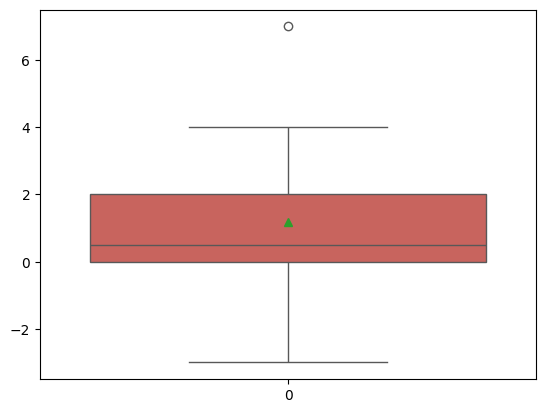

In [7]:
plot_n_boxplots([quasi_results[:, 1, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

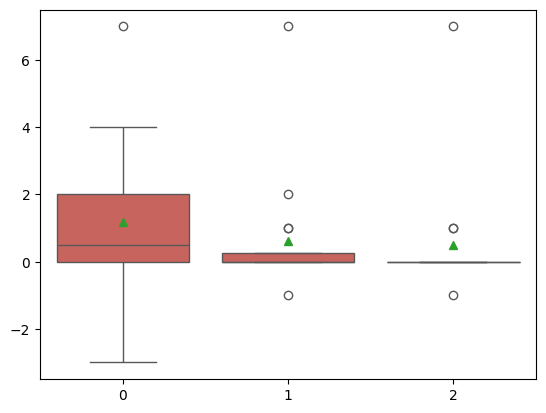

In [8]:
plot_n_boxplots([quasi_results[:, 1, 0, 1].flatten(), quasi_results[:, 1, 1, 1].flatten(), quasi_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to mean

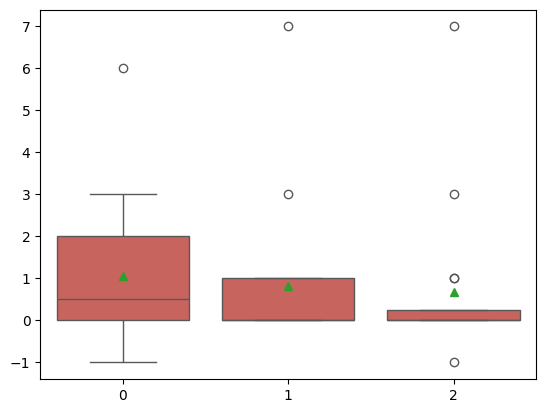

In [9]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten(), quasi_results[:, 0, 1, 1].flatten(), quasi_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [10]:
print(quasi_results[:, 1, 0, 1].flatten())

[ 1.  0.  4.  0.  1.  0.  4.  2.  0. -3.  0.  0.  1.  2.  0.  7.]


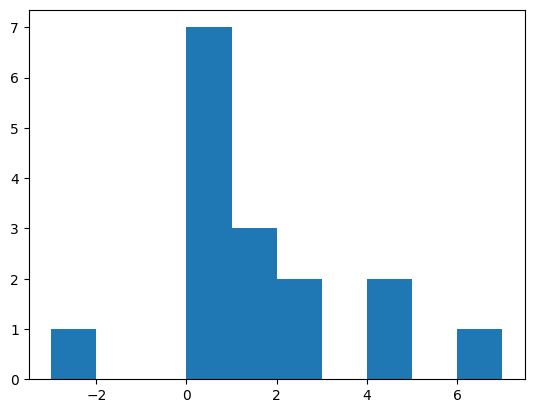

In [11]:
plt.hist(quasi_results[:, 1, 0, 1])
plt.show()

In [12]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 1, 0, 1], popmean=0) 
print(t_statistic , p_value)

2.0771954736751606 0.05537712218258962


Mean has less variance, is it better?

In [13]:
print(quasi_results[:, 0, 0, 1].flatten())

[ 0.  2. -1. -1.  1.  2.  3.  2.  2.  0.  0.  0.  0.  1.  0.  6.]


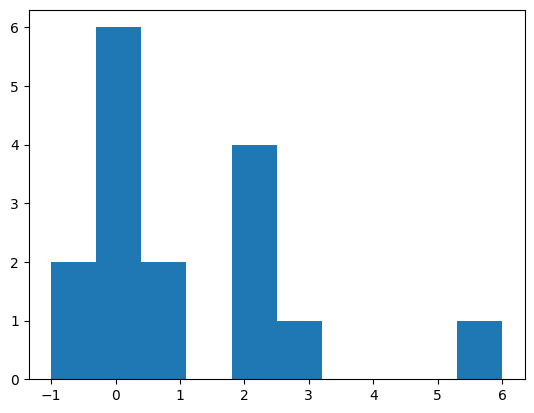

In [14]:
plt.hist(quasi_results[:, 0, 0, 1])
plt.show()

In [15]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

2.402561881660157 0.02967594234088081


It is actually significant, unlike the others

Investigating the statisitcs of itteration maximazing the average number of biological components.

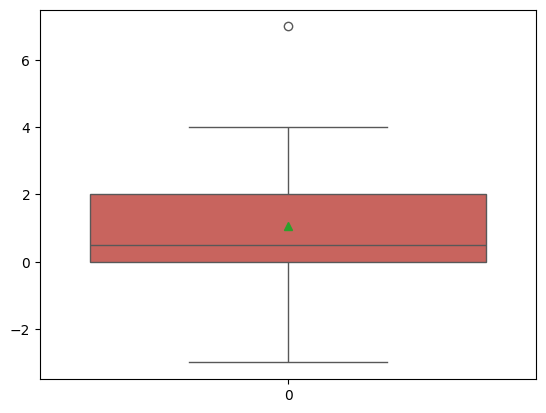

In [16]:
plot_n_boxplots([quasi_results[:, 1, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

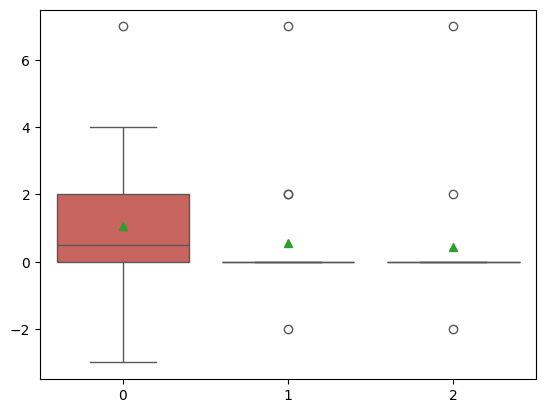

In [17]:
plot_n_boxplots([quasi_results[:, 1, 0, 2].flatten(), quasi_results[:, 1, 1, 2].flatten(), quasi_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to mean

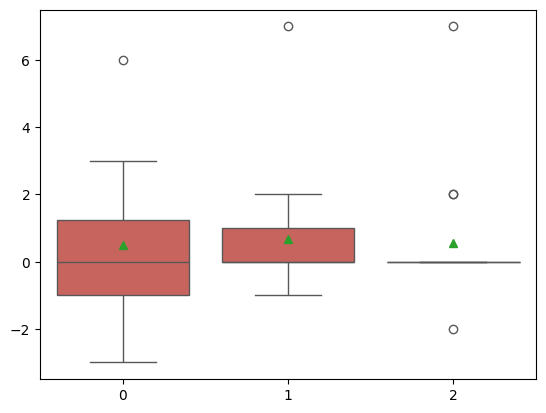

In [18]:
plot_n_boxplots([quasi_results[:, 0, 0, 2].flatten(), quasi_results[:, 0, 1, 2].flatten(), quasi_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [19]:
print(quasi_results[:, 1, 0, 2].flatten())

[ 0.  0.  4.  1.  1.  0.  2.  2.  0. -3. -1.  0.  2.  2.  0.  7.]


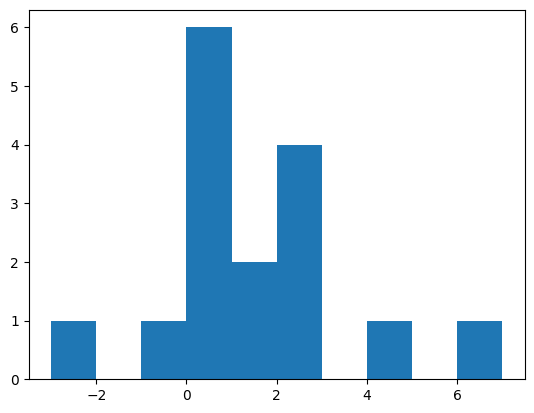

In [20]:
plt.hist(quasi_results[:, 1, 0, 2])
plt.show()

In [21]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 1, 0, 2], popmean=0) 
print(t_statistic , p_value)

1.9014502169237912 0.07662854446499406


Here mean seems way worse?

In [22]:
print(quasi_results[:, 0, 0, 2].flatten())

[-3.  2. -1. -2.  1.  2.  1.  0.  1.  0. -1. -1.  0.  3.  0.  6.]


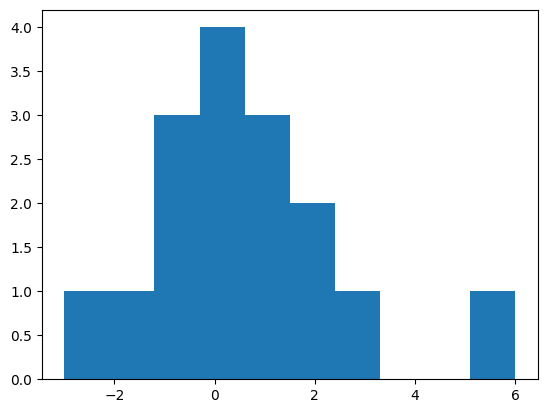

In [23]:
plt.hist(quasi_results[:, 0, 0, 2])
plt.show()

In [24]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 0, 0, 2], popmean=0) 
print(t_statistic , p_value)

0.9393364366277243 0.36243906471558474


Then Analysis of how peaks thresholding does on its own

In [25]:
peak_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_1\peak")

In [26]:
peak_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [27]:
for i, pth in enumerate(peak_folder.iterdir()):
    current = np.load(pth)
    peak_results[i, :, :, :] = current.copy()

In [28]:
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(0, 0)
(0, 0)
(1, 0)
(1, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

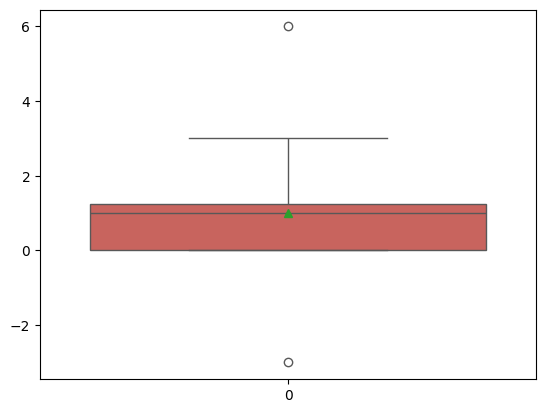

In [29]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

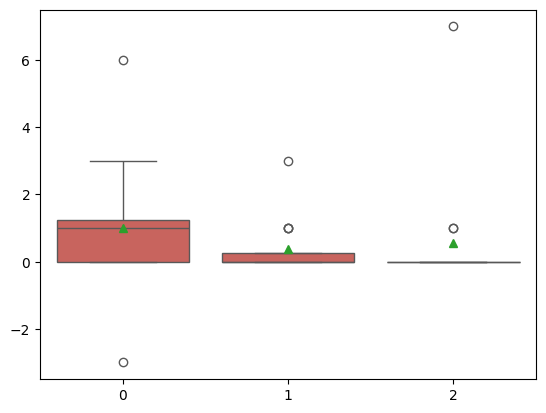

In [30]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten(), peak_results[:, 0, 1, 1].flatten(), peak_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

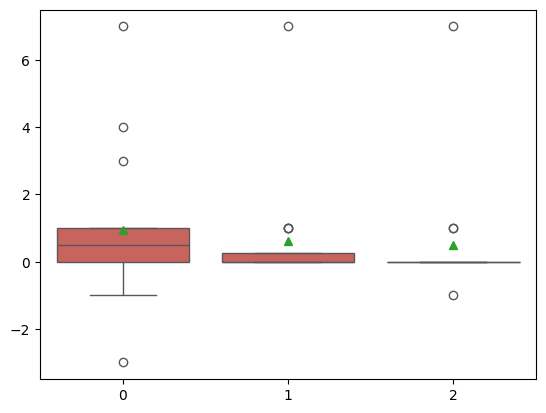

In [31]:
plot_n_boxplots([peak_results[:, 1, 0, 1].flatten(), peak_results[:, 1, 1, 1].flatten(), peak_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [32]:
print(peak_results[:, 0, 0, 1].flatten())

[ 1.  1.  2.  0.  1.  1.  6.  0.  3. -3.  0.  0.  0.  1.  0.  3.]


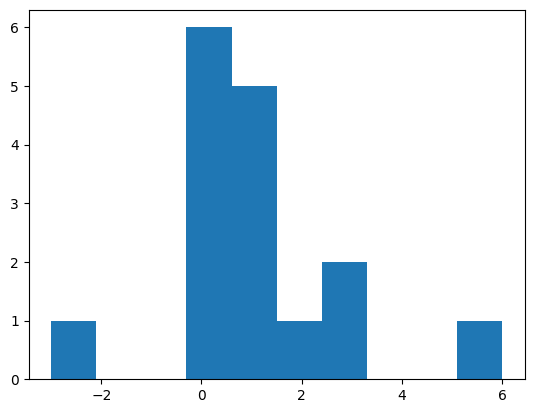

In [33]:
plt.hist(peak_results[:, 0, 0, 1])
plt.show()

In [34]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

2.0701966780270626 0.05610820318855975


Median seems a lot worse?

In [35]:
print(peak_results[:, 1, 0, 1].flatten())

[ 1.  0.  3.  1.  1.  0.  4.  0.  1. -3. -1.  0.  0.  1.  0.  7.]


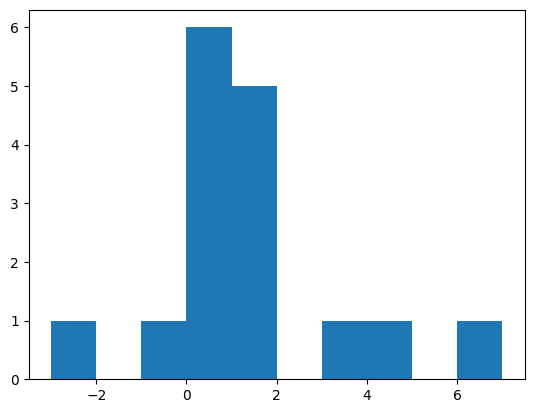

In [36]:
plt.hist(peak_results[:, 1, 0, 1])
plt.show()

In [37]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 1, 0, 1], popmean=0)
print(t_statistic , p_value)

1.677750191403345 0.11410356962839535


Investigating the statisitcs of itteration maximazing the average number of biological components.

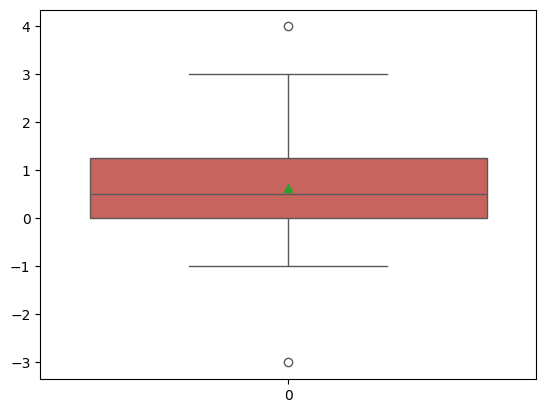

In [38]:
plot_n_boxplots([peak_results[:, 0, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

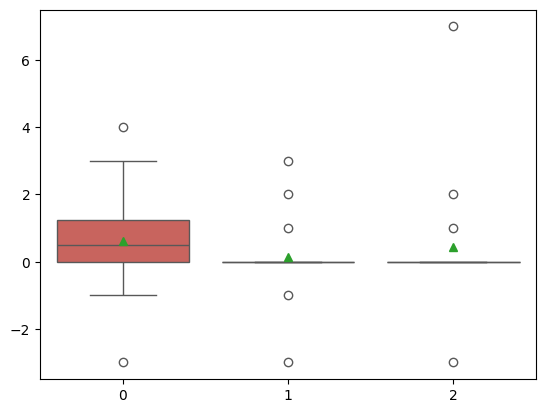

In [39]:
plot_n_boxplots([peak_results[:, 0, 0, 2].flatten(), peak_results[:, 0, 1, 2].flatten(), peak_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to mean

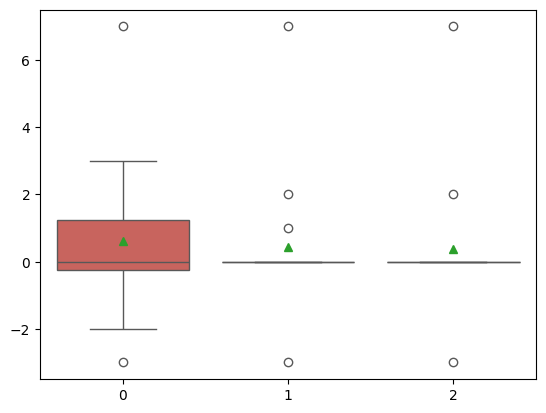

In [40]:
plot_n_boxplots([peak_results[:, 1, 0, 2].flatten(), peak_results[:, 1, 1, 2].flatten(), peak_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [41]:
print(peak_results[:, 0, 0, 2].flatten())

[ 0.  0.  2.  1.  0.  1.  4.  0.  1. -3. -1. -1.  0.  2.  1.  3.]


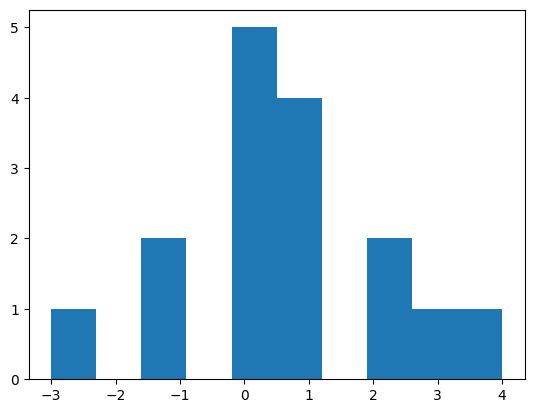

In [42]:
plt.hist(peak_results[:, 0, 0, 2])
plt.show()

In [43]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 0, 0, 2], popmean=0) 
print(t_statistic , p_value)

1.4985022462565507 0.1547512674928845


Compared to median

In [44]:
print(peak_results[:, 1, 0, 2].flatten())

[ 0.  1.  3.  1.  0.  0.  2.  0. -1. -3. -2. -1.  0.  2.  1.  7.]


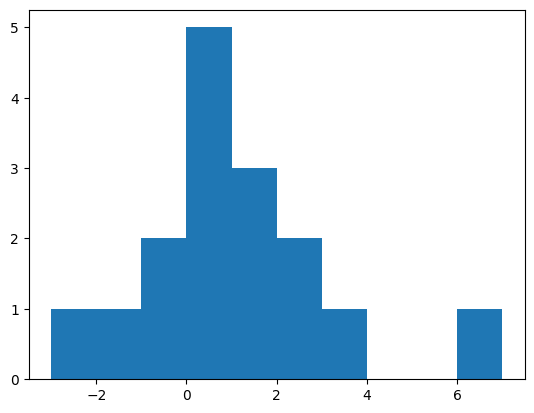

In [45]:
plt.hist(peak_results[:, 1, 0, 2])
plt.show()

In [46]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 1, 0, 2], popmean=0) 
print(t_statistic , p_value)

1.09808368595043 0.28948222392042566


Then comined!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

So the same problem here, Peaks is not working...

In [47]:
combined_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_1\combined")

In [48]:
combined_results = np.zeros(
    (   
        16,
        2,
        3,
        2,
        3,
        5
    )
)

In [49]:
for i, pth in enumerate(combined_folder.iterdir()):
    current = np.load(pth)
    combined_results[i, :, :, :, :, :] = current.copy()

In [50]:
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 0], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 1], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 2], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 3], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 4], 0)), (2, 3, 2, 3)))

(0, 0, 0, 0)
(1, 0, 0, 0)
(1, 0, 0, 0)
(1, 0, 0, 0)
(1, 0, 0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

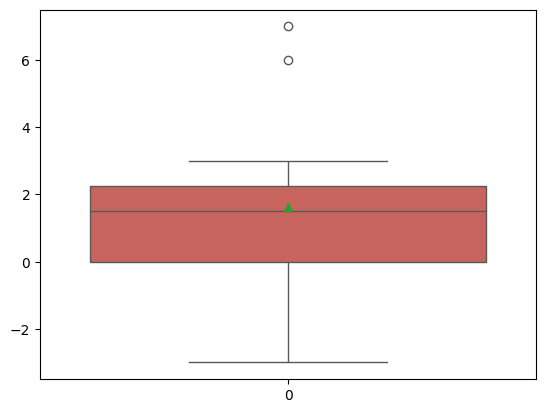

In [51]:
plot_n_boxplots([combined_results[:, 1, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

In [52]:
print(combined_results[:, 1, 0, 0, 0, 1].flatten())

[ 1.  3.  1.  0.  2.  2.  6.  2.  3. -3.  0.  0.  0.  2.  0.  7.]


Compared to the other thresholds

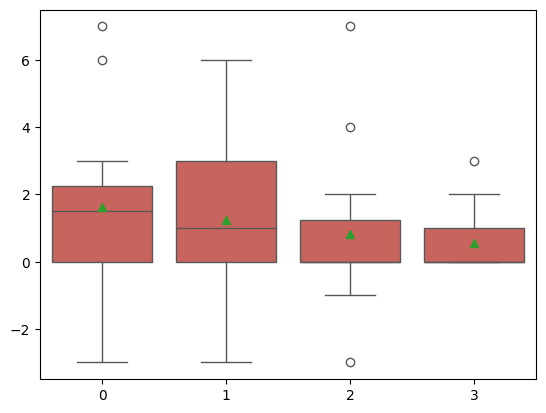

In [53]:
plot_n_boxplots([combined_results[:, 1, 0, 0, 0, 1], combined_results[:, 1, 1, 0, 0, 1], combined_results[:, 1, 0, 0, 1, 1], combined_results[:, 1, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Very interesting here the combined with lower thresholds seem more robust, Importantly it does not reduce the infamous one to -3

More stats for the best one.

In [54]:
print(combined_results[:, 1, 0, 0, 0, 1].flatten())

[ 1.  3.  1.  0.  2.  2.  6.  2.  3. -3.  0.  0.  0.  2.  0.  7.]


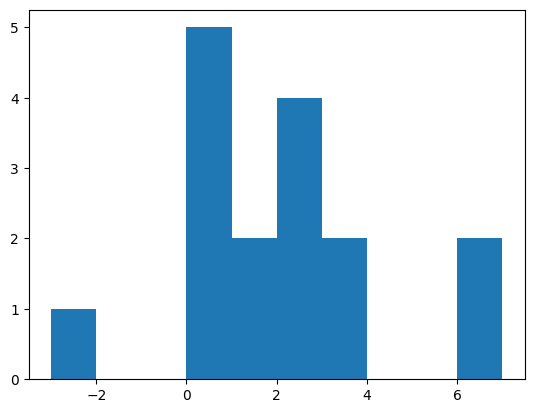

In [55]:
plt.hist(combined_results[:, 1, 0, 0, 0, 1])
plt.show()

In [56]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 1, 0, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

2.68741924943285 0.016879091703891687


So according to this heavily statistically power lacing analysis, this is better then any of them alone.

What a bout the most "robust" one?

In [57]:
print(combined_results[:, 1, 1, 0, 1, 1])

[1. 0. 2. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 3.]


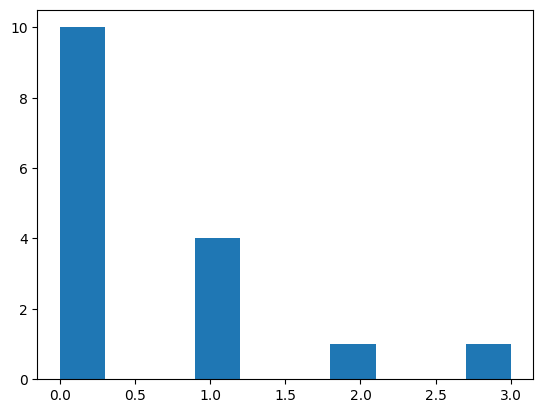

In [58]:
plt.hist(combined_results[:, 1, 1, 0, 1, 1])
plt.show()

In [59]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 1, 1, 0, 1, 1], popmean=0) 
print(t_statistic , p_value)

2.522153156432539 0.023456340703733255


Here also seem very good.

Investigating the statisitcs of itteration maximazing the average number of biological components.

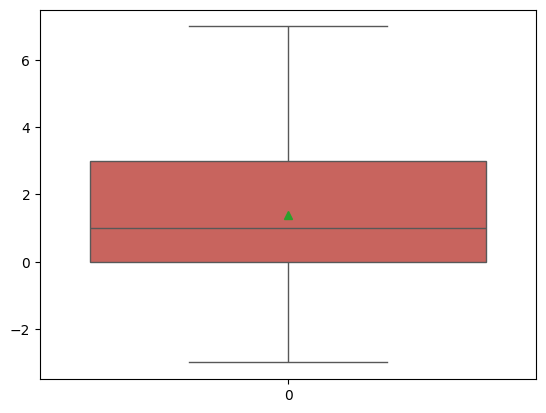

In [60]:
plot_n_boxplots([combined_results[:, 1, 0, 0, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

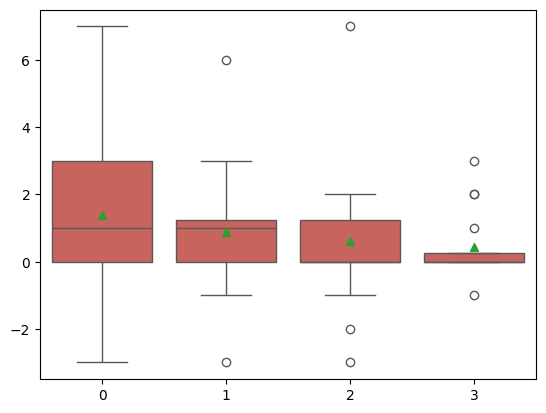

In [61]:
plot_n_boxplots([combined_results[:, 1, 0, 0, 0, 2], combined_results[:, 1, 1, 0, 0, 2], combined_results[:, 1, 0, 0, 1, 2], combined_results[:, 1, 1, 0, 1, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Here, the lower thresholds not so robust.

Compared to mean

More stats for the best one.

In [62]:
print(combined_results[:, 1, 0, 0, 0, 2].flatten())

[ 0.  3.  1.  1.  1.  3.  4.  2.  1. -3. -1. -1.  0.  3.  1.  7.]


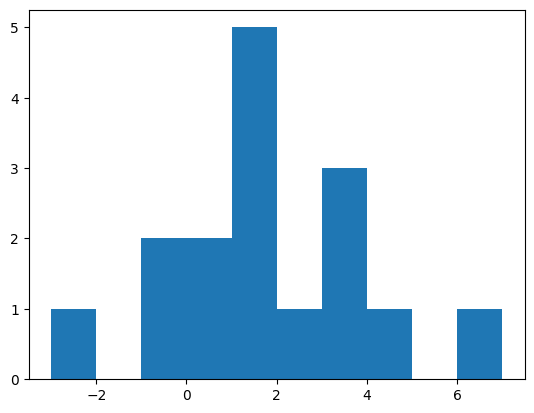

In [63]:
plt.hist(combined_results[:, 1, 0, 0, 0, 2])
plt.show()

In [64]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 1, 0, 0, 0, 2], popmean=0) 
print(t_statistic , p_value)

2.355941152829656 0.03250051403524896


The lower "robust" threshold one not so good?

In [65]:
print(combined_results[:, 1, 1, 0, 1, 2].flatten())

[ 0.  0.  2.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  2.  1.  3.]


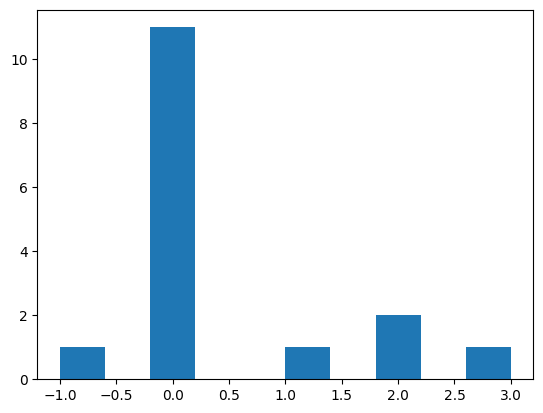

In [66]:
plt.hist(combined_results[:, 1, 1, 0, 1, 2])
plt.show()

In [67]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 1, 1, 0, 1, 2], popmean=0) 
print(t_statistic , p_value)

1.697749375254331 0.11019832727987112


In [68]:
base_line_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_1\base_line")

In [69]:
base_line_results = np.zeros(
    (   
        16,
        5
    )
)

In [70]:
for i, pth in enumerate(base_line_folder.iterdir()):
    current = np.load(pth)
    base_line_results[i, :] = current.copy()

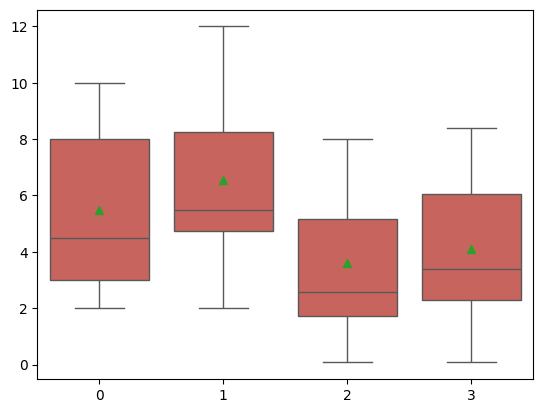

In [71]:
plot_n_boxplots([base_line_results[:, 1], base_line_results[:, 2], base_line_results[:, 3]*10, base_line_results[:, 4]*10], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])